In [1]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt
from tqdm import tqdm
M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

c:\Users\LyuQi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
seq_new = np.load("sequence_new.npy")

Raman pulses: 100%|██████████| 480/480 [01:01<00:00,  7.80it/s]


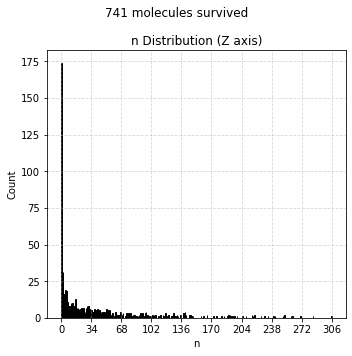

{'survival_rate_mean': array(0.741),
 'survival_rate_sem': array(0.00042379),
 'mot_mean': array([ 0.59919028,  1.14035088, 38.85964912]),
 'mot_sem': array([0.00394728, 0.00504602, 0.0681001 ]),
 'ground_state_rate_mean': array(0.16361789),
 'ground_state_rate_sem': array(0.00037421),
 'N': array(1000),
 'B': array(1000)}

In [3]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new, res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

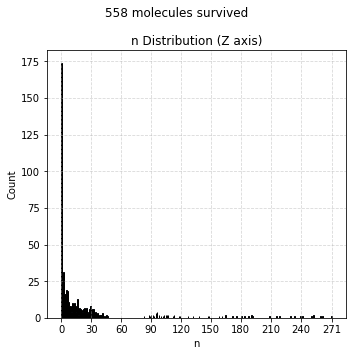

{'survival_rate_mean': array(0.558),
 'survival_rate_sem': array(0.00050573),
 'mot_mean': array([ 0.55555556,  1.00716846, 24.3655914 ]),
 'mot_sem': array([0.00440492, 0.00492452, 0.06626123]),
 'ground_state_rate_mean': array(0.16361789),
 'ground_state_rate_sem': array(0.00037307),
 'N': array(1000),
 'B': array(1000)}

In [4]:
mol = mol_0.copy()
clean_pulse = [[2, -8, 24e3, 7e-5]]
cr.raman_cool_with_pumping(mol, clean_pulse, res, K_max=0)
dist = cr.get_n_distribution_gpu(mol, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol)
result

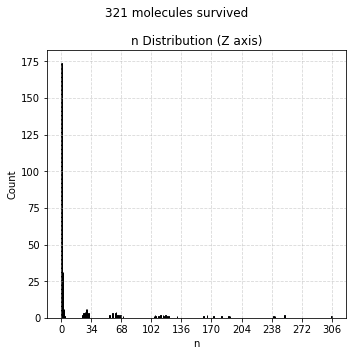

{'survival_rate_mean': array(0.321),
 'survival_rate_sem': array(0.00046896),
 'mot_mean': array([ 0.43925234,  0.87538941, 20.91277259]),
 'mot_sem': array([0.00469987, 0.00713296, 0.08654936]),
 'ground_state_rate_mean': array(0.16971545),
 'ground_state_rate_sem': array(0.00037533),
 'N': array(1000),
 'B': array(1000)}

In [23]:
mol = mol_0.copy()
cr.apply_lz_sweep(mol, axis=2, d_n=-3, Omega_lin=10e3, Delta_sweep=5e3, t_sec=1e-3, res=res)
dist = cr.get_n_distribution_gpu(mol, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol)
result